In [1]:
!pip install -q kaggle
import json

data = {"username":"tunkedsaro","key":"ff3d00dc680ff94caf6f8d4d9bcd3168"}
json_data = json.dumps(data)

# Write the JSON string to a file
file_path = "/content/kaggle.json"
with open(file_path, 'w') as json_file:
    json_file.write(json_data)

!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/ #copy api key ---- depend on your directory -- my directory is .../colab/..
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list
!kaggle competitions download -c digit-recognizer
!unzip /content/digit-recognizer.zip

ref                                                                 title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rabieelkharoua/students-performance-dataset                         📚 Students Performance Dataset 📚                     66KB  2024-06-12 23:09:20          13124        267  1.0              
nelgiriyewithana/most-streamed-spotify-songs-2024                   Most Streamed Spotify Songs 2024                    496KB  2024-06-15 18:50:51           9962        210  1.0              
ihelon/coffee-sales                                                 Coffee Sales                                         10KB  2024-07-03 20:04:43           2441         50  1.0              
omarsobhy14/hotel-revenue2024           

In [2]:
import pandas as pd

In [3]:
pd.read_csv("/content/train.csv")

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
pd.read_csv("/content/test.csv")

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
pd.read_csv("/content/sample_submission.csv")

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
27995,27996,0
27996,27997,0
27997,27998,0
27998,27999,0


<hr>

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns

# Loading Digit Recognizer Data Frome csv

In [7]:
import pandas as pd
import torch
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
from sklearn.model_selection import train_test_split

In [8]:
class MNISTDataset(Dataset):
    def __init__(self, data, label, transform=None):
        self.data = data
        self.label = label
        self.transform = transform
    def __len__(self):
        return len(self.data)
    def __getitem__(self, idx):
        image = self.data[idx].astype('float32').reshape(28, 28)/255.0
        label = self.label[idx]
        return image, label

In [9]:
df = pd.read_csv("/content/train.csv")

In [10]:
X = df.iloc[:,1:].values                           # เอาทุก rows, ตั้งแต่ [1:]
y = df.iloc[:,0].values

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
# Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [13]:
trainset = MNISTDataset(X_train, y_train, transform=transform)
valset   = MNISTDataset(X_val, y_val, transform=transform)

In [14]:
# Data loader
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
valloader   = DataLoader(valset, batch_size=64, shuffle=False)

<hr>

In [15]:
import torch
import torch.nn.functional as F
import math

In [16]:
class KANLinear(torch.nn.Module):
    def __init__(self,in_features,out_features,grid_size=5,spline_order=3,scale_noise=0.1,scale_base=1.0,scale_spline=1.0,enable_standalone_scale_spline=True,base_activation=torch.nn.SiLU,grid_eps=0.02,grid_range=[-1,1]):
        super(KANLinear, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.grid_size = grid_size
        self.spline_order = spline_order

        h = (grid_range[1]-grid_range[0])/grid_size
        grid = (
            (
                torch.arange(-spline_order, grid_size + spline_order + 1) * h + grid_range[0]
            )
            .expand(in_features, -1)
            .contiguous()
        )
        self.register_buffer("grid", grid)

        self.base_weight = torch.nn.Parameter(torch.Tensor(out_features, in_features))
        self.spline_weight = torch.nn.Parameter(torch.Tensor(out_features, in_features, grid_size + spline_order))
        if enable_standalone_scale_spline:
            self.spline_scaler = torch.nn.Parameter(torch.Tensor(out_features, in_features))
        self.scale_noise = scale_noise
        self.scale_base  = scale_base
        self.scale_spline = scale_spline
        self.enable_standalone_scale_spline = enable_standalone_scale_spline
        self.base_activation = base_activation()
        self.grid_eps = grid_eps

        self.reset_parameters()
    def reset_parameters(self):
        # ไม่เข้าใจหน้าที่ว่ามีไปทำไม แล้ว noise พวกนี้ใช้เพื่ออะไร
        torch.nn.init.kaiming_uniform_(self.base_weight, a=math.sqrt(5) * self.scale_base)
        with torch.no_grad():
            noise = ((torch.rand(self.grid_size + 1, self.in_features, self.out_features)-1/2)* self.scale_noise/ self.grid_size)
            self.spline_weight.data.copy_(
                (self.scale_spline if not self.enable_standalone_scale_spline else 1.0)
                * self.curve2coeff(
                    self.grid.T[self.spline_order : -self.spline_order],
                    noise,
                )
            )
            if self.enable_standalone_scale_spline:
                # torch.nn.init.constant_(self.spline_scaler, self.scale_spline)
                torch.nn.init.kaiming_uniform_(self.spline_scaler, a=math.sqrt(5) * self.scale_spline)

    def b_splines(self, x: torch.Tensor):
        """
        Compute the B-spline bases for the given input tensor.
        Args:x (torch.Tensor): Input tensor of shape (batch_size, in_features).
        Returns:
            torch.Tensor: B-spline bases tensor of shape (batch_size, in_features, grid_size + spline_order).
        """
        assert x.dim() == 2 and x.size(1) == self.in_features
        grid: torch.Tensor = (
            self.grid
        )  # (in_features, grid_size + 2 * spline_order + 1)
        x = x.unsqueeze(-1)
        bases = ((x >= grid[:, :-1]) & (x < grid[:, 1:])).to(x.dtype)
        for k in range(1, self.spline_order + 1):
            bases = (
                (x - grid[:, : -(k + 1)])
                / (grid[:, k:-1] - grid[:, : -(k + 1)])
                * bases[:, :, :-1]
            ) + (
                (grid[:, k + 1 :] - x)
                / (grid[:, k + 1 :] - grid[:, 1:(-k)])
                * bases[:, :, 1:]
            )
        assert bases.size() == (
            x.size(0),
            self.in_features,
            self.grid_size + self.spline_order,
        )
        return bases.contiguous()
    def curve2coeff(self, x: torch.Tensor, y: torch.Tensor):
        """
        Compute the coefficients of the curve that interpolates the given points.
        Args:
            x (torch.Tensor): Input tensor of shape (batch_size, in_features).
            y (torch.Tensor): Output tensor of shape (batch_size, in_features, out_features).
        Returns:
            torch.Tensor: Coefficients tensor of shape (out_features, in_features, grid_size + spline_order).
        """
        assert x.dim() == 2 and x.size(1) == self.in_features
        assert y.size() == (x.size(0), self.in_features, self.out_features)
        A = self.b_splines(x).transpose(
            0, 1
        )  # (in_features, batch_size, grid_size + spline_order)
        B = y.transpose(0, 1)  # (in_features, batch_size, out_features)
        solution = torch.linalg.lstsq(
            A, B
        ).solution  # (in_features, grid_size + spline_order, out_features)
        result = solution.permute(
            2, 0, 1
        )  # (out_features, in_features, grid_size + spline_order)
        assert result.size() == (
            self.out_features,
            self.in_features,
            self.grid_size + self.spline_order,
        )
        return result.contiguous()
    @property
    def scaled_spline_weight(self):
        return self.spline_weight * (
            self.spline_scaler.unsqueeze(-1)
            if self.enable_standalone_scale_spline
            else 1.0
        )
    def forward(self, x: torch.Tensor):
        assert x.size(-1) == self.in_features
        original_shape = x.shape
        x = x.view(-1, self.in_features)

        base_output = F.linear(self.base_activation(x), self.base_weight)
        spline_output = F.linear(
            self.b_splines(x).view(x.size(0), -1),
            self.scaled_spline_weight.view(self.out_features, -1),
        )
        output = base_output + spline_output

        output = output.view(*original_shape[:-1], self.out_features)
        return output

    @torch.no_grad()
    def update_grid(self, x: torch.Tensor, margin=0.01):
        assert x.dim() == 2 and x.size(1) == self.in_features
        batch = x.size(0)

        splines = self.b_splines(x)  # (batch, in, coeff)
        splines = splines.permute(1, 0, 2)  # (in, batch, coeff)
        orig_coeff = self.scaled_spline_weight  # (out, in, coeff)
        orig_coeff = orig_coeff.permute(1, 2, 0)  # (in, coeff, out)
        unreduced_spline_output = torch.bmm(splines, orig_coeff)  # (in, batch, out)
        unreduced_spline_output = unreduced_spline_output.permute(
            1, 0, 2
        )  # (batch, in, out)

        # sort each channel individually to collect data distribution
        x_sorted = torch.sort(x, dim=0)[0]
        grid_adaptive = x_sorted[
            torch.linspace(
                0, batch - 1, self.grid_size + 1, dtype=torch.int64, device=x.device
            )
        ]

        uniform_step = (x_sorted[-1] - x_sorted[0] + 2 * margin) / self.grid_size
        grid_uniform = (
            torch.arange(
                self.grid_size + 1, dtype=torch.float32, device=x.device
            ).unsqueeze(1)
            * uniform_step
            + x_sorted[0]
            - margin
        )

        grid = self.grid_eps * grid_uniform + (1 - self.grid_eps) * grid_adaptive
        grid = torch.concatenate(
            [
                grid[:1]
                - uniform_step
                * torch.arange(self.spline_order, 0, -1, device=x.device).unsqueeze(1),
                grid,
                grid[-1:]
                + uniform_step
                * torch.arange(1, self.spline_order + 1, device=x.device).unsqueeze(1),
            ],
            dim=0,
        )

        self.grid.copy_(grid.T)
        self.spline_weight.data.copy_(self.curve2coeff(x, unreduced_spline_output))

    def regularization_loss(self, regularize_activation=1.0, regularize_entropy=1.0):
        """
        Compute the regularization loss.

        This is a dumb simulation of the original L1 regularization as stated in the
        paper, since the original one requires computing absolutes and entropy from the
        expanded (batch, in_features, out_features) intermediate tensor, which is hidden
        behind the F.linear function if we want an memory efficient implementation.

        The L1 regularization is now computed as mean absolute value of the spline
        weights. The authors implementation also includes this term in addition to the
        sample-based regularization.
        """
        l1_fake = self.spline_weight.abs().mean(-1)
        regularization_loss_activation = l1_fake.sum()
        p = l1_fake / regularization_loss_activation
        regularization_loss_entropy = -torch.sum(p * p.log())
        return (
            regularize_activation * regularization_loss_activation
            + regularize_entropy * regularization_loss_entropy
        )


In [17]:
class KAN(torch.nn.Module):
    def __init__(self,layers_hidden,grid_size=5,spline_order=3,scale_noise=0.1,scale_base=1.0,scale_spline=1.0,base_activation=torch.nn.SiLU,grid_eps=0.02,grid_range=[-1, 1],):
        super(KAN, self).__init__()
        self.grid_size = grid_size
        self.spline_order = spline_order
        self.layers = torch.nn.ModuleList()

        for in_features, out_features in zip(layers_hidden, layers_hidden[1:]):
            self.layers.append(
                KANLinear(
                    in_features,
                    out_features,
                    grid_size=grid_size,
                    spline_order = spline_order,
                    scale_noise=scale_noise,
                    scale_base=scale_base,
                    scale_spline=scale_spline,
                    base_activation=base_activation,
                    grid_eps=grid_eps,
                    grid_range=grid_range,
                )
            )
    def forward(self, x:torch.Tensor, update_grid=False):
        for layer in self.layers:
            if update_grid:
                layer.update_grid(x)
            x = layer(x)
        return x
    def regularization_loss(self, regularize_activation=1.0, regularize_entropy=1.0):
        return sum(
            layer.regularization_loss(regularize_activation, regularize_entropy)
            for layer in self.layers
        )

<hr>

# Initialization of network

Input Layer is 784 i.e. 28 x 28 which is dimension of image <br>
Hidden layer is 2 x input_layer+1 i.e. 1569 <br>
Output layer is 10 for all digits

In [18]:
# Define model
model = KAN([28 * 28, 28 * 28 * 2 + 1, 10])
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

KAN(
  (layers): ModuleList(
    (0-1): 2 x KANLinear(
      (base_activation): SiLU()
    )
  )
)

Defining Optimizer and Learning Rate Decay

In [19]:
# Define optimizer
optimizer = optim.AdamW(model.parameters(), lr=1e-3, weight_decay=1e-4)
# Define learning rate scheduler
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.8)

In [20]:
# Define loss
criterion = nn.CrossEntropyLoss()

train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []


# training of Network

In [21]:
for epoch in range(20):
    # Train
    model.train()
    epoch_train_loss = 0
    epoch_train_accuracy = 0
    with tqdm(trainloader) as pbar:
        for i, (images, labels) in enumerate(pbar):
            images = images.view(-1, 28 * 28).to(device)
            labels = labels.to(device)
            optimizer.zero_grad()
            output = model(images)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()
            accuracy = (output.argmax(dim=1) == labels).float().mean()
            epoch_train_loss += loss.item()
            epoch_train_accuracy += accuracy.item()
            pbar.set_postfix(loss=loss.item(), accuracy=accuracy.item(), lr=optimizer.param_groups[0]['lr'])

    epoch_train_loss /= len(trainloader)
    epoch_train_accuracy /= len(trainloader)
    train_losses.append(epoch_train_loss)
    train_accuracies.append(epoch_train_accuracy)

    # Validation
    model.eval()
    val_loss = 0
    val_accuracy = 0
    all_labels = []
    all_preds = []
    with torch.no_grad():
        for images, labels in valloader:
            images = images.view(-1, 28 * 28).to(device)
            labels = labels.to(device)
            output = model(images)
            val_loss += criterion(output, labels).item()
            val_accuracy += (output.argmax(dim=1) == labels).float().mean().item()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(output.argmax(dim=1).cpu().numpy())

    val_loss /= len(valloader)
    val_accuracy /= len(valloader)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    # Update learning rate
    scheduler.step()

    print(f"Epoch {epoch + 1}, Train Loss: {epoch_train_loss}, Train Accuracy: {epoch_train_accuracy}, Val Loss: {val_loss}, Val Accuracy: {val_accuracy}")


100%|██████████| 525/525 [00:07<00:00, 68.06it/s, accuracy=0.953, loss=0.144, lr=0.001]


Epoch 1, Train Loss: 0.3159138977314745, Train Accuracy: 0.9084523809523809, Val Loss: 0.16606353420877096, Val Accuracy: 0.9491003787878788


100%|██████████| 525/525 [00:06<00:00, 76.05it/s, accuracy=0.969, loss=0.0602, lr=0.0008]


Epoch 2, Train Loss: 0.10323447083876956, Train Accuracy: 0.969047619047619, Val Loss: 0.10347153706772422, Val Accuracy: 0.9682765151515151


100%|██████████| 525/525 [00:06<00:00, 75.65it/s, accuracy=0.969, loss=0.07, lr=0.00064]


Epoch 3, Train Loss: 0.050461768114141055, Train Accuracy: 0.9847321428571428, Val Loss: 0.08638986027235109, Val Accuracy: 0.9723011363636364


100%|██████████| 525/525 [00:06<00:00, 76.50it/s, accuracy=1, loss=0.0102, lr=0.000512]


Epoch 4, Train Loss: 0.02497202444998991, Train Accuracy: 0.9936904761904762, Val Loss: 0.0743550954626478, Val Accuracy: 0.9789299242424242


100%|██████████| 525/525 [00:06<00:00, 77.12it/s, accuracy=1, loss=0.00656, lr=0.00041]


Epoch 5, Train Loss: 0.0120547766136449, Train Accuracy: 0.9979166666666667, Val Loss: 0.07600837371975297, Val Accuracy: 0.9785748106060606


100%|██████████| 525/525 [00:06<00:00, 75.65it/s, accuracy=1, loss=0.00591, lr=0.000328]


Epoch 6, Train Loss: 0.006214853823628454, Train Accuracy: 0.9993452380952381, Val Loss: 0.07226981425650814, Val Accuracy: 0.9799952651515151


100%|██████████| 525/525 [00:06<00:00, 77.17it/s, accuracy=1, loss=0.00381, lr=0.000262]


Epoch 7, Train Loss: 0.0036967743081151552, Train Accuracy: 0.9999404761904762, Val Loss: 0.07215012758123604, Val Accuracy: 0.9797585227272727


100%|██████████| 525/525 [00:06<00:00, 76.95it/s, accuracy=1, loss=0.00127, lr=0.00021]


Epoch 8, Train Loss: 0.002672070971845339, Train Accuracy: 0.9999702380952381, Val Loss: 0.07159660100693475, Val Accuracy: 0.9798768939393939


100%|██████████| 525/525 [00:06<00:00, 75.66it/s, accuracy=1, loss=0.00391, lr=0.000168]


Epoch 9, Train Loss: 0.0020224725171768417, Train Accuracy: 1.0, Val Loss: 0.07223250167567818, Val Accuracy: 0.98046875


100%|██████████| 525/525 [00:06<00:00, 77.26it/s, accuracy=1, loss=0.000725, lr=0.000134]


Epoch 10, Train Loss: 0.0016246538334858736, Train Accuracy: 1.0, Val Loss: 0.07361275177170297, Val Accuracy: 0.9797585227272727


100%|██████████| 525/525 [00:06<00:00, 76.15it/s, accuracy=1, loss=0.00203, lr=0.000107]


Epoch 11, Train Loss: 0.0013550938944709265, Train Accuracy: 1.0, Val Loss: 0.07348697298783174, Val Accuracy: 0.9802320075757576


100%|██████████| 525/525 [00:06<00:00, 76.23it/s, accuracy=1, loss=0.00114, lr=8.59e-5]


Epoch 12, Train Loss: 0.001149796168652496, Train Accuracy: 1.0, Val Loss: 0.0736421709556122, Val Accuracy: 0.98046875


100%|██████████| 525/525 [00:06<00:00, 77.55it/s, accuracy=1, loss=0.0018, lr=6.87e-5]


Epoch 13, Train Loss: 0.0009988633492251948, Train Accuracy: 1.0, Val Loss: 0.07411978715478626, Val Accuracy: 0.9799952651515151


100%|██████████| 525/525 [00:06<00:00, 76.18it/s, accuracy=1, loss=0.000318, lr=5.5e-5]


Epoch 14, Train Loss: 0.0008785217432332934, Train Accuracy: 1.0, Val Loss: 0.07538166264081762, Val Accuracy: 0.9803503787878788


100%|██████████| 525/525 [00:06<00:00, 76.58it/s, accuracy=1, loss=0.00084, lr=4.4e-5]


Epoch 15, Train Loss: 0.0007826633876538836, Train Accuracy: 1.0, Val Loss: 0.0747722625085523, Val Accuracy: 0.9798768939393939


100%|██████████| 525/525 [00:06<00:00, 76.18it/s, accuracy=1, loss=0.000379, lr=3.52e-5]


Epoch 16, Train Loss: 0.0007061145490539881, Train Accuracy: 1.0, Val Loss: 0.07523396652267723, Val Accuracy: 0.9799952651515151


100%|██████████| 525/525 [00:06<00:00, 76.32it/s, accuracy=1, loss=0.000453, lr=2.81e-5]


Epoch 17, Train Loss: 0.0006450153510030802, Train Accuracy: 1.0, Val Loss: 0.07562538676376623, Val Accuracy: 0.9802320075757576


100%|██████████| 525/525 [00:06<00:00, 76.78it/s, accuracy=1, loss=0.000201, lr=2.25e-5]


Epoch 18, Train Loss: 0.0005927085995790549, Train Accuracy: 1.0, Val Loss: 0.07586400783188627, Val Accuracy: 0.98046875


100%|██████████| 525/525 [00:06<00:00, 75.99it/s, accuracy=1, loss=0.000357, lr=1.8e-5]


Epoch 19, Train Loss: 0.0005502144081678818, Train Accuracy: 1.0, Val Loss: 0.07631218294409337, Val Accuracy: 0.9801136363636364


100%|██████████| 525/525 [00:06<00:00, 77.18it/s, accuracy=1, loss=0.000383, lr=1.44e-5]


Epoch 20, Train Loss: 0.0005158271788552936, Train Accuracy: 1.0, Val Loss: 0.07656139957191155, Val Accuracy: 0.9802320075757576


# Training Plot of Network

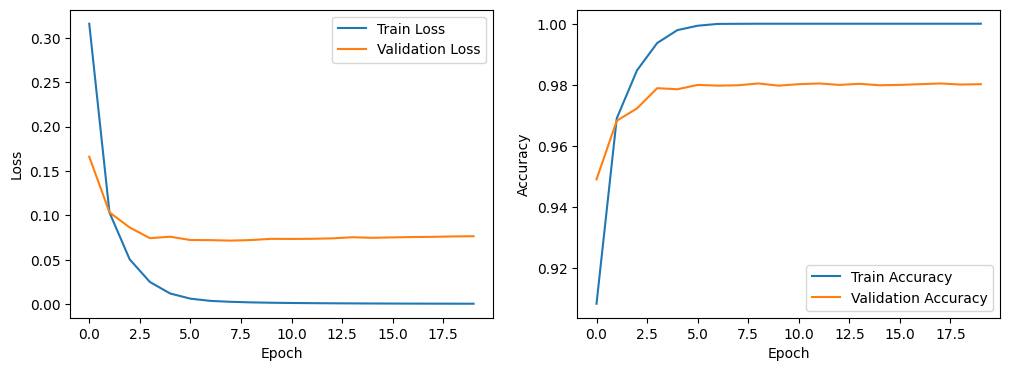

In [22]:
# Plot training and validation loss and accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

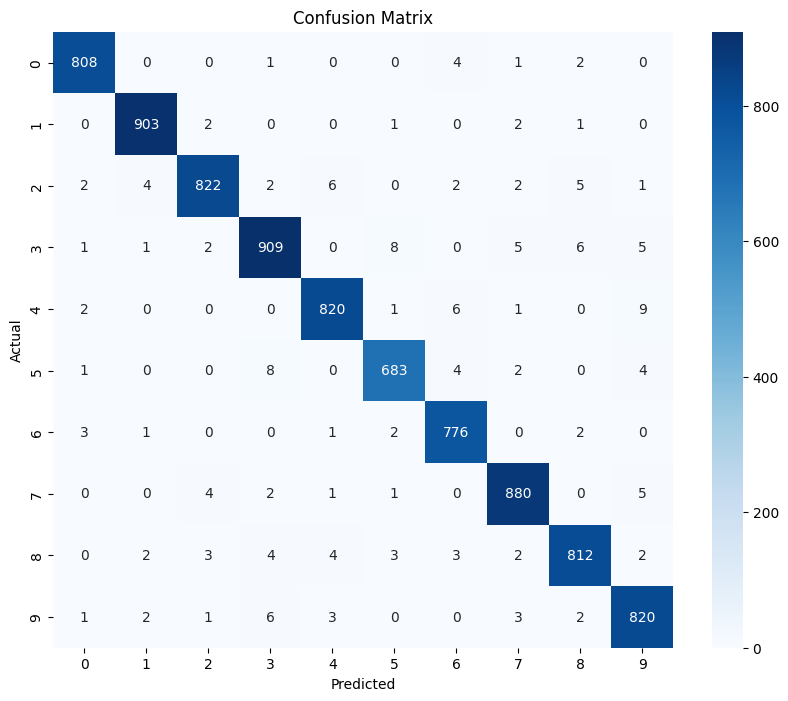

In [23]:
import numpy as np

# Define class labels
class_labels = np.arange(10)

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [25]:
import pandas as pd

test_df = pd.read_csv('/content/test.csv')

test_data = torch.tensor(test_df.values, dtype=torch.float32)

test_data = (test_data - 0.5) / 0.5
test_data = test_data.to(device)
model.eval()
with torch.no_grad():
    test_output = model(test_data)
    test_predictions = test_output.argmax(dim=1).cpu().numpy()

submission_df = pd.DataFrame({'ImageId': range(1, len(test_predictions) + 1), 'Label': test_predictions})
submission_df.to_csv('submission.csv', index=False)
